## Sidneyville Manufacturing: Pythonic Version

In [1]:
# import Glop package
from ortools.linear_solver import pywraplp as glp
import lptools as lpt

In [2]:
#Create LP model object
mymodel = glp.Solver('Sidneyville',glp.Solver.GLOP_LINEAR_PROGRAMMING)

In [3]:
inf = mymodel.infinity()

variables = {'Roll_Top': (0, inf, 115),    # (lower bound, upper bound, objective coefficient)
             'Regular':  (0, inf,  90)}

constraints = {'Pine':  (-inf, 200, [10, 20]),    # (lower bound, upper bound, coefficient list)
               'Cedar': (-inf, 128, [ 4, 16]),
               'Maple': (-inf, 220, [15, 10])}

In [4]:
# Create Variables and Objective
mymodel.Objective().SetMaximization()
for v in variables:
    #print(v, variables[v])
    (lb,ub,c) = variables[v]
    var = mymodel.NumVar(lb, ub, v)
    mymodel.Objective().SetCoefficient(var,c)
    

In [5]:
lpt.print_model(mymodel)

Variables:
Roll_Top, Regular 

maximize: 115.0*Roll_Top + 90.0*Regular 

Subject To:

Bounds:
Roll_Top >= 0.0
Regular >= 0.0


In [6]:
# Create Constraints
for c in constraints:
    (lb,ub,coeff_lst) = constraints[c]
    constr = mymodel.Constraint(lb,ub,c)
    #print(list(zip(mymodel.variables(),coeff_lst)))
    for (v,coeff) in zip(mymodel.variables(), coeff_lst):
        constr.SetCoefficient(v,coeff)


In [7]:
#solve model and display results
status = mymodel.Solve()
print('Solution Status =', status)
print('Optimal Value = %.2f' % mymodel.Objective().Value())
for v in mymodel.variables():
    print('%s = %.2f' % (v.name(),v.solution_value()))

Solution Status = 0
Optimal Value = 1740.00
Roll_Top = 12.00
Regular = 4.00


In [8]:
#mymodel.Clear()

In [9]:
lpt.print_model(mymodel)

Variables:
Roll_Top, Regular 

maximize: 115.0*Roll_Top + 90.0*Regular 

Subject To:
Pine: 10.0*Roll_Top + 20.0*Regular <= 200.0
Cedar: 4.0*Roll_Top + 16.0*Regular <= 128.0
Maple: 15.0*Roll_Top + 10.0*Regular <= 220.0

Bounds:
Roll_Top >= 0.0
Regular >= 0.0


In [10]:
# display variable information
print('Variable    LB   Value    UB   Reduced Cost')
for v in mymodel.variables():
    print('%8s  %5.1f  %5.1f  %5.1f  %5.2f' % (v.name() ,v.lb() ,v.solution_value() ,v.ub() ,v.reduced_cost()))

Variable    LB   Value    UB   Reduced Cost
Roll_Top    0.0   12.0    inf   0.00
 Regular    0.0    4.0    inf   0.00


In [11]:
#display constraint information
print('Constraint    LB    Value  UB     Dual')
for (c,lhs) in zip(mymodel.constraints(), mymodel.ComputeConstraintActivities()):
    print('%10s  %5.1f  %5.1f  %5.1f  %5.2f' % (c.name(), c.lb(), lhs, c.ub(), c.dual_value()))

Constraint    LB    Value  UB     Dual
      Pine   -inf  200.0  200.0   1.00
     Cedar   -inf  112.0  128.0  -0.00
     Maple   -inf  220.0  220.0   7.00


## Optimization Parameter Analysis

In [12]:
import matplotlib.pyplot as plt

In [ ]:
# parameter analysis for amount of pine available fro 200 to 230
param_lst = list(range(200, 231))  # list of pine values
optval_lst = list()
constr = mymodel.constraints()[0]
for b in param_lst:
    constr.SetUb(b)
    mymodel.Solve()
    print('%d    %7.2f' % (b, mymodel.Objective().Value()))
    optval_lst.append(mymodel.Objective().Value())
constr.SetUb(param_lst[0])
plt.plot(param_lst, optval_lst)

In [ ]:
# parameter analysis for Roll Top desk coefficeint from 0 to 115
param_lst = list(range(0,116))
optval_lst = list()
var = mymodel.variables()[0]
for c in param_lst:
    mymodel.Objective().SetCoefficient(var, c)
    mymodel.Solve()
    print('%d    %7.2f' % (c, mymodel.Objective().Value()))
    optval_lst.append(mymodel.Objective().Value())
mymodel.Objective().SetCoefficient(var, param_lst[0])
plt.plot(param_lst, optval_lst)

220    1740.00
221    1747.00
222    1754.00
223    1761.00
224    1768.00
225    1775.00
226    1782.00
227    1789.00
228    1796.00
229    1803.00
230    1810.00
231    1817.00
232    1824.00
233    1831.00
234    1838.00
235    1845.00
236    1852.00
237    1859.00
238    1866.00
239    1873.00
240    1880.00
241    1887.00
242    1894.00
243    1901.00
244    1908.00
245    1915.00
246    1922.00
247    1929.00
248    1936.00
249    1943.00
250    1950.00
251    1957.00
252    1964.00
253    1971.00
254    1978.00
255    1985.00
256    1992.00
257    1999.00
258    2006.00
259    2013.00
260    2020.00
261    2027.00
262    2034.00
263    2041.00
264    2048.00
265    2055.00
266    2062.00
267    2069.00
268    2076.00
269    2083.00
270    2090.00
271    2097.00
272    2104.00
273    2111.00
274    2118.00
275    2125.00
276    2132.00
277    2139.00
278    2146.00
279    2153.00
280    2160.00
281    2167.00
282    2174.00
283    2181.00
284    2188.00
285    2195.00
286    220

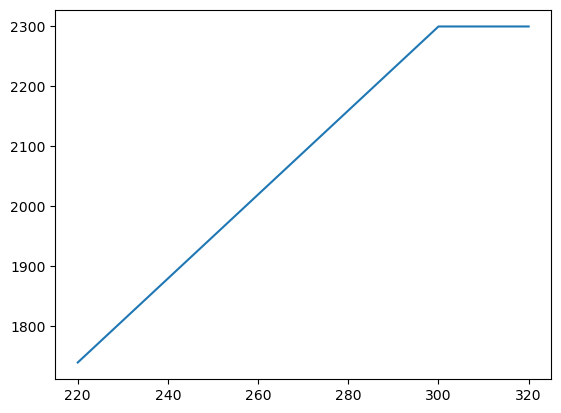

In [13]:
# parameter analysis for amount of Maple from 220 to 320
param_lst = list(range(220, 321))  
optval_lst = list()
constr = mymodel.constraints()[2]
for d in param_lst:
    constr.SetUb(d)
    mymodel.Solve()
    print('%d    %7.2f' % (d, mymodel.Objective().Value()))
    optval_lst.append(mymodel.Objective().Value())
constr.SetUb(param_lst[0])
plt.plot(param_lst, optval_lst)